# Analyse et nettoyage du jeu de données 

In [2]:
import pandas as pd

### Chargement du fichier excel et transformation de chaque feuille en csv

In [ ]:
# Chemin vers le fichier Excel d'entrée
excel_file_path = 'online_retail_II.xlsx'

# Charger le fichier Excel en utilisant pandas
xls = pd.ExcelFile(excel_file_path)

# Parcourir chaque feuille de calcul du fichier Excel
for sheet_name in xls.sheet_names:
    # Charger la feuille de calcul en tant que dataframe
    data_frame = xls.parse(sheet_name)
    
    # Chemin vers le fichier CSV de sortie
    csv_file_path = f'online_retail{sheet_name}.csv'
    
    # Convertir le dataframe en fichier CSV
    data_frame.to_csv(csv_file_path, index=False, encoding='utf-8')
    
print('Conversion terminée.')


### Concaténation des deux feuilles en un fichier csv

In [ ]:
# Chemin vers le premier fichier CSV
csv_file1 = 'online_retailYear 2009-2010.csv'

# Chemin vers le deuxième fichier CSV
csv_file2 = 'online_retailYear 2010-2011.csv'

# Charger les deux fichiers CSV en utilisant pandas
data_frame1 = pd.read_csv(csv_file1)
data_frame2 = pd.read_csv(csv_file2)

# Concaténer les deux dataframes
concatenated_data = pd.concat([data_frame1, data_frame2])

# Chemin vers le fichier CSV de sortie
output_csv = 'online_retail.csv'

# Enregistrer le dataframe concaténé en tant que fichier CSV
concatenated_data.to_csv(output_csv, index=False)

print('Concaténation terminée.')


## Nettoyage des données

In [28]:
df_ukretail = pd.read_csv('online_retail.csv')

In [29]:
df_ukretail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
df_ukretail.shape

(1067371, 8)

In [6]:
df_ukretail.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


### Identifier les valeurs manquantes

In [30]:
nan_count = df_ukretail.isna().sum()
print(nan_count.sort_values)

<bound method Series.sort_values of Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64>


Garde-t-on les lignes où le client n'est pas identifié ? Sachant qu'on cherche à classifier les clients. Nous faisons le choix de les supprimer.

In [31]:
df_ukretail = df_ukretail.dropna(subset=['Customer ID'])

### Identifier les doublons

Il existe des lignes identiques, mais on ne sait pas si ce sont réellement des doublons ou si cela peut s'expliquer par d'autres informations dont on ne dispose pas. Nous choisissons donc de garder les lignes.

### Conversion des types

In [32]:
df_ukretail['Customer ID'] = df_ukretail['Customer ID'].astype('str')

### Consistance des données

In [33]:
df_ukretail.describe()

,Quantity,Price
count,824364.000000,824364.000000
mean,12.414574,3.676800
std,188.976099,70.241388
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


Les lignes où les quantités sont négatives correspondent à des commandes annulées. Il faut les garder pour que les dépenses des clients soient réalistes et s'équilibrent entre la commande puis son annulation.

Les commandes où le prix est à 0 correspond probablement à des cadeaux. Nous choisissons de supprimer les lignes, qui ne nous apprendrons rien sur le comportement des clients.

In [34]:
df_ukretail = df_ukretail[df_ukretail['Price']> 0]

Nous supprimons les lignes où le stockcode est composé uniquement de lettres pour ne pas prendre en compte tout ce qui concerne les frais de port, les tests, qui ne donnent pas de renseignements sur le client.

In [36]:
# Appliquer le filtrage sur la colonne "stock code"
df_ukretail = df_ukretail[~df_ukretail['StockCode'].str.match(r'^[A-Za-z]')]

In [37]:
df_ukretail.describe()

,Quantity,Price
count,820565.000000,820565.000000
mean,12.445481,2.967188
std,188.873328,4.452660
min,-80995.000000,0.030000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,649.500000


In [38]:
nan_count = df_ukretail.isna().sum()
print(nan_count.sort_values)

<bound method Series.sort_values of Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64>


### Feature engineering

On peut ajouter une colonne qui nous donne le prix unitaire multiplié par la quantité.

In [39]:
df_ukretail['total'] = df_ukretail['Quantity']*df_ukretail['Price']

In [16]:
df_ukretail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'total'],
      dtype='object')

### Group by

In [40]:
df_gp_invoice = df_ukretail.groupby(['Customer ID','Invoice']).sum().drop('Price',axis=1)
df_gp_invoice

/tmp/ipykernel_6664/2962250399.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gp_invoice = df_ukretail.groupby(['Customer ID','Invoice']).sum().drop('Price',axis=1)


Quantity     total
Customer ID Invoice                    
12346.0     499763          5     27.05
            513774         19    142.31
            541431      74215  77183.60
            C541433    -74215 -77183.60
12347.0     529924        509    611.53
...                       ...       ...
18287.0     534346        186    331.50
            554065        488    765.28
            570715        990   1001.32
            573167        108     70.68
            C489592        -2     -5.10

[43876 rows x 2 columns]

In [41]:
df_rfm = df_ukretail.groupby('Customer ID').agg({'Invoice': 'nunique','Quantity':'sum' ,'InvoiceDate': 'max', 'total':'sum'})
# Renommer les colonnes du DataFrame df_rfm
df_rfm.columns = ['NombreCommandes', 'NombreArticles','DateDerniereCommande', 'MontantTotal']

df_rfm

,NombreCommandes,NombreArticles,DateDerniereCommande,MontantTotal
Customer ID,,,,
12346.0,4,24,2011-01-18 10:17:00,169.36
12347.0,8,3286,2011-12-07 15:52:00,5633.32
12348.0,5,2704,2011-09-25 13:13:00,1658.40
12349.0,4,1616,2011-11-21 09:51:00,3654.54
12350.0,1,196,2011-02-02 16:01:00,294.40
...,...,...,...,...
18283.0,22,1731,2011-12-06 12:02:00,2730.70
18284.0,1,493,2010-10-04 11:33:00,411.68
18285.0,1,144,2010-02-17 10:24:00,377.00


In [42]:
cancelled_orders_count = df_ukretail[df_ukretail['Invoice'].str.startswith('C')].groupby('Customer ID')['Invoice'].nunique()

df_rfm = df_rfm.merge(cancelled_orders_count,how='left',on='Customer ID')
df_rfm['Invoice'] = df_rfm['Invoice'].fillna(0)
df_rfm


,NombreCommandes,NombreArticles,DateDerniereCommande,MontantTotal,Invoice
Customer ID,,,,,
12346.0,4,24,2011-01-18 10:17:00,169.36,1.0
12347.0,8,3286,2011-12-07 15:52:00,5633.32,0.0
12348.0,5,2704,2011-09-25 13:13:00,1658.40,0.0
12349.0,4,1616,2011-11-21 09:51:00,3654.54,1.0
12350.0,1,196,2011-02-02 16:01:00,294.40,0.0
...,...,...,...,...,...
18283.0,22,1731,2011-12-06 12:02:00,2730.70,0.0
18284.0,1,493,2010-10-04 11:33:00,411.68,0.0
18285.0,1,144,2010-02-17 10:24:00,377.00,0.0


In [43]:
df_rfm['NombreCommandesNonAnnulees'] = df_rfm['NombreCommandes']-df_rfm['Invoice']*2
df_rfm

,NombreCommandes,NombreArticles,DateDerniereCommande,MontantTotal,Invoice,NombreCommandesNonAnnulees
Customer ID,,,,,,
12346.0,4,24,2011-01-18 10:17:00,169.36,1.0,2.0
12347.0,8,3286,2011-12-07 15:52:00,5633.32,0.0,8.0
12348.0,5,2704,2011-09-25 13:13:00,1658.40,0.0,5.0
12349.0,4,1616,2011-11-21 09:51:00,3654.54,1.0,2.0
12350.0,1,196,2011-02-02 16:01:00,294.40,0.0,1.0
...,...,...,...,...,...,...
18283.0,22,1731,2011-12-06 12:02:00,2730.70,0.0,22.0
18284.0,1,493,2010-10-04 11:33:00,411.68,0.0,1.0
18285.0,1,144,2010-02-17 10:24:00,377.00,0.0,1.0


In [44]:
df_rfm = df_rfm.rename(columns={'Invoice': 'CommandesAnnulees'})
df_rfm

,NombreCommandes,NombreArticles,DateDerniereCommande,MontantTotal,CommandesAnnulees,NombreCommandesNonAnnulees
Customer ID,,,,,,
12346.0,4,24,2011-01-18 10:17:00,169.36,1.0,2.0
12347.0,8,3286,2011-12-07 15:52:00,5633.32,0.0,8.0
12348.0,5,2704,2011-09-25 13:13:00,1658.40,0.0,5.0
12349.0,4,1616,2011-11-21 09:51:00,3654.54,1.0,2.0
12350.0,1,196,2011-02-02 16:01:00,294.40,0.0,1.0
...,...,...,...,...,...,...
18283.0,22,1731,2011-12-06 12:02:00,2730.70,0.0,22.0
18284.0,1,493,2010-10-04 11:33:00,411.68,0.0,1.0
18285.0,1,144,2010-02-17 10:24:00,377.00,0.0,1.0


In [45]:
df_rfm['PanierMoyen'] = df_rfm['MontantTotal']/df_rfm['NombreCommandesNonAnnulees']

In [51]:
df_rfm = df_rfm[df_rfm['NombreCommandesNonAnnulees']>0]


In [52]:
from datetime import datetime

# Convertir la colonne de dates en format datetime
df_rfm['DateDerniereCommande'] = pd.to_datetime(df_rfm['DateDerniereCommande'])

# Calculer le nombre de jours depuis la dernière commande
date_str = '2011-12-10 00:00:00'
date_format = '%Y-%m-%d %H:%M:%S'

date_obj = datetime.strptime(date_str, date_format)
df_rfm['Recency'] = (date_obj - df_rfm['DateDerniereCommande']).dt.days
df_rfm


/tmp/ipykernel_6664/1119255233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['DateDerniereCommande'] = pd.to_datetime(df_rfm['DateDerniereCommande'])
/tmp/ipykernel_6664/1119255233.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['Recency'] = (date_obj - df_rfm['DateDerniereCommande']).dt.days


,NombreCommandes,NombreArticles,DateDerniereCommande,MontantTotal,CommandesAnnulees,NombreCommandesNonAnnulees,PanierMoyen,Recency,NombreArticlesMoyenParCommande
Customer ID,,,,,,,,,
12346.0,4,24,2011-01-18 10:17:00,169.36,1.0,2.0,84.680000,325,12.000000
12347.0,8,3286,2011-12-07 15:52:00,5633.32,0.0,8.0,704.165000,2,410.750000
12348.0,5,2704,2011-09-25 13:13:00,1658.40,0.0,5.0,331.680000,75,540.800000
12349.0,4,1616,2011-11-21 09:51:00,3654.54,1.0,2.0,1827.270000,18,808.000000
12350.0,1,196,2011-02-02 16:01:00,294.40,0.0,1.0,294.400000,310,196.000000
...,...,...,...,...,...,...,...,...,...
18283.0,22,1731,2011-12-06 12:02:00,2730.70,0.0,22.0,124.122727,3,78.681818
18284.0,1,493,2010-10-04 11:33:00,411.68,0.0,1.0,411.680000,431,493.000000
18285.0,1,144,2010-02-17 10:24:00,377.00,0.0,1.0,377.000000,660,144.000000


In [53]:
df_rfm['NombreArticlesMoyenParCommande'] = df_rfm['NombreArticles']/df_rfm['NombreCommandesNonAnnulees']
df_rfm

/tmp/ipykernel_6664/4288352892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['NombreArticlesMoyenParCommande'] = df_rfm['NombreArticles']/df_rfm['NombreCommandesNonAnnulees']


,NombreCommandes,NombreArticles,DateDerniereCommande,MontantTotal,CommandesAnnulees,NombreCommandesNonAnnulees,PanierMoyen,Recency,NombreArticlesMoyenParCommande
Customer ID,,,,,,,,,
12346.0,4,24,2011-01-18 10:17:00,169.36,1.0,2.0,84.680000,325,12.000000
12347.0,8,3286,2011-12-07 15:52:00,5633.32,0.0,8.0,704.165000,2,410.750000
12348.0,5,2704,2011-09-25 13:13:00,1658.40,0.0,5.0,331.680000,75,540.800000
12349.0,4,1616,2011-11-21 09:51:00,3654.54,1.0,2.0,1827.270000,18,808.000000
12350.0,1,196,2011-02-02 16:01:00,294.40,0.0,1.0,294.400000,310,196.000000
...,...,...,...,...,...,...,...,...,...
18283.0,22,1731,2011-12-06 12:02:00,2730.70,0.0,22.0,124.122727,3,78.681818
18284.0,1,493,2010-10-04 11:33:00,411.68,0.0,1.0,411.680000,431,493.000000
18285.0,1,144,2010-02-17 10:24:00,377.00,0.0,1.0,377.000000,660,144.000000


In [54]:
df_rfm.describe()

,NombreCommandes,NombreArticles,MontantTotal,CommandesAnnulees,NombreCommandesNonAnnulees,PanierMoyen,Recency,NombreArticlesMoyenParCommande
count,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000
mean,7.708235,1820.672398,2977.128277,1.191493,5.325249,472.225869,191.175204,310.563167
std,15.797722,8867.246210,14525.596588,3.391096,10.722189,812.218154,205.383458,1602.521544
min,1.000000,1.000000,2.900000,0.000000,1.000000,2.900000,0.000000,1.000000
25%,1.000000,196.000000,347.750000,0.000000,1.000000,188.400000,23.000000,100.000000
50%,4.000000,512.000000,902.320000,0.000000,3.000000,315.821667,85.000000,179.454545
75%,8.000000,1413.000000,2315.750000,1.000000,6.000000,508.660000,372.000000,319.000000
max,466.000000,364956.000000,606243.250000,93.000000,301.000000,23090.470000,738.000000,87167.000000


In [61]:
df_country = df_ukretail[['Customer ID', 'Country']].drop_duplicates()
df_country

,Customer ID,Country
0,13085.0,United Kingdom
12,13078.0,United Kingdom
31,15362.0,United Kingdom
54,18102.0,United Kingdom
71,12682.0,France
...,...,...
1059273,15195.0,United Kingdom
1062430,13436.0,United Kingdom
1062716,15520.0,United Kingdom
1063525,13298.0,United Kingdom


In [62]:
df_rfm = df_rfm.merge(df_country,how='left',on='Customer ID')

In [204]:
df_rfm.to_csv('df_rfm.csv')

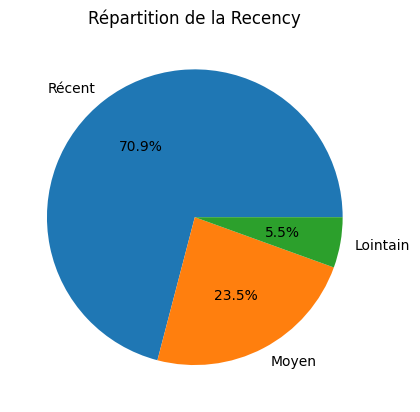

In [55]:
import matplotlib.pyplot as plt

# Définir les catégories
categories = ['Récent', 'Moyen', 'Lointain']

# Compter le nombre de clients dans chaque catégorie
counts = df_rfm['Recency'].apply(lambda x: 'Récent' if x <= 300 else ('Moyen' if x <= 600 else 'Lointain')).value_counts()

# Créer le pie plot
plt.pie(counts, labels=categories, autopct='%1.1f%%')

# Ajouter un titre
plt.title('Répartition de la Recency')

# Afficher le pie plot
plt.show()


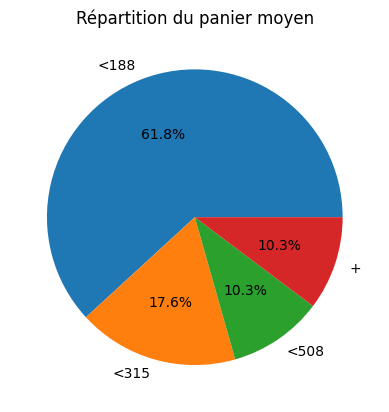

In [56]:
import matplotlib.pyplot as plt

# Définir les catégories
categories = ['<188', '<315', '<508','+']

# Compter le nombre de clients dans chaque catégorie
counts = df_rfm['Recency'].apply(lambda x: 'Pas cher' if x <= 188 else ('Moyen' if x <= 315 else ('Moyen +' if x <= 508 else 'Cher'))).value_counts()


# Créer le pie plot
plt.pie(counts, labels=categories, autopct='%1.1f%%')

# Ajouter un titre
plt.title('Répartition du panier moyen')

# Afficher le pie plot
plt.show()